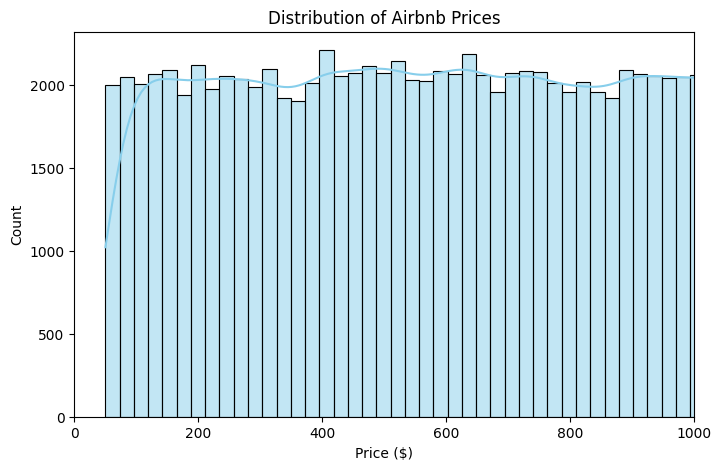

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=50, kde=True, color='skyblue')
plt.xlim(0, 1000)  # to remove extreme outliers
plt.title('Distribution of Airbnb Prices')
plt.xlabel('Price ($)')
plt.ylabel('Count')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the Excel file into a pandas DataFrame
df = pd.read_excel('/content/Airbnb_Open_Data.xlsx')

# Display the first few rows to confirm it loaded correctly
display(df.head())

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


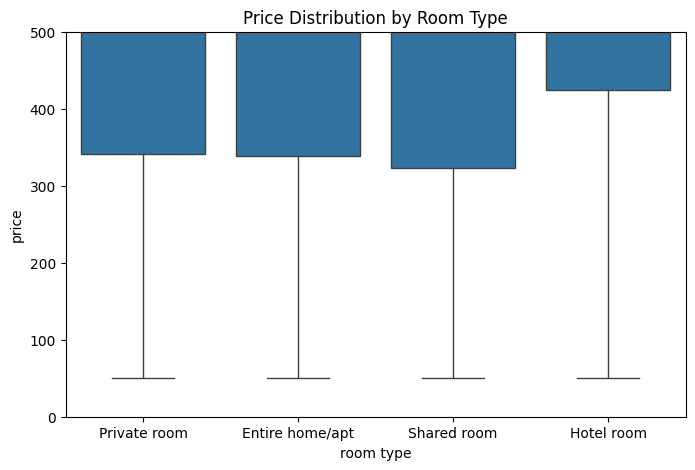

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='room type', y='price', data=df)
plt.ylim(0, 500)  # limit outliers
plt.title('Price Distribution by Room Type')
plt.show()

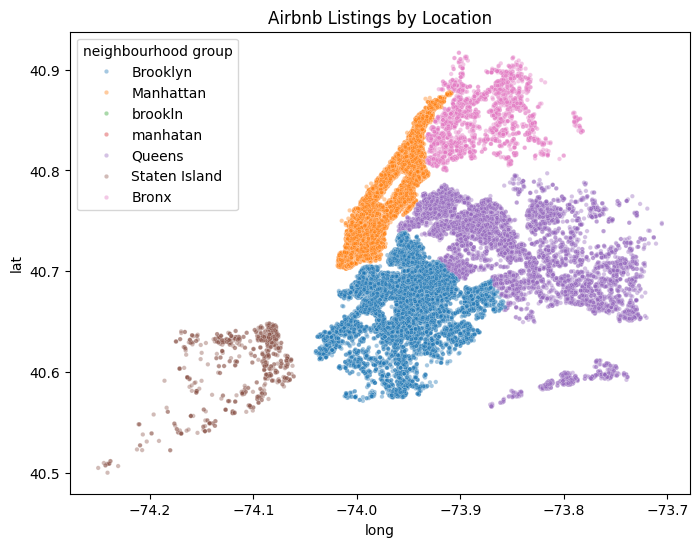

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='long', y='lat', hue='neighbourhood group',
                data=df, alpha=0.4, s=10, palette='tab10')
plt.title('Airbnb Listings by Location')
plt.show()

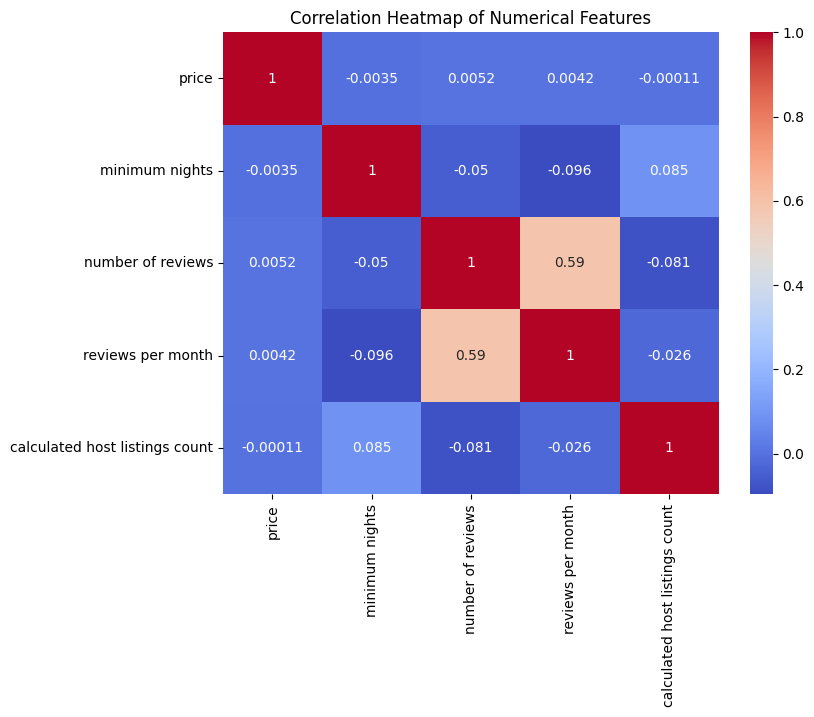

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['price','minimum nights','number of reviews','reviews per month','calculated host listings count']].corr(),
            annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

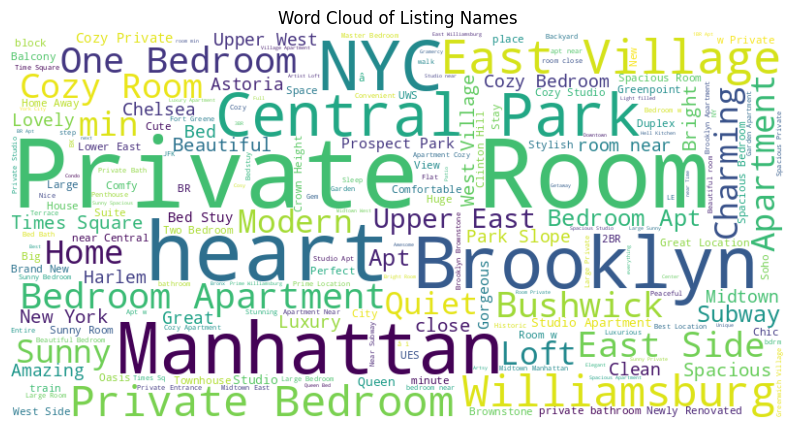

In [ ]:
from wordcloud import WordCloud

text = " ".join(df['NAME'].astype(str).dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Listing Names')
plt.show()

In [ ]:
print("Shape:", df.shape)
print("Columns:", df.columns)
print(df.info())
print(df.describe())

Shape: (102599, 26)
Columns: Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_

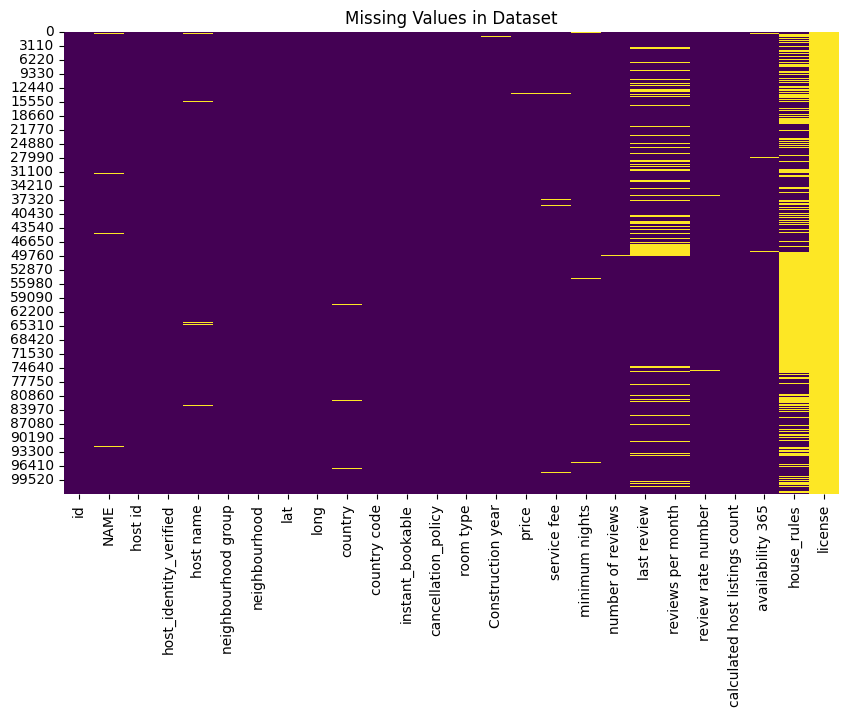

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values in Dataset")
plt.show()

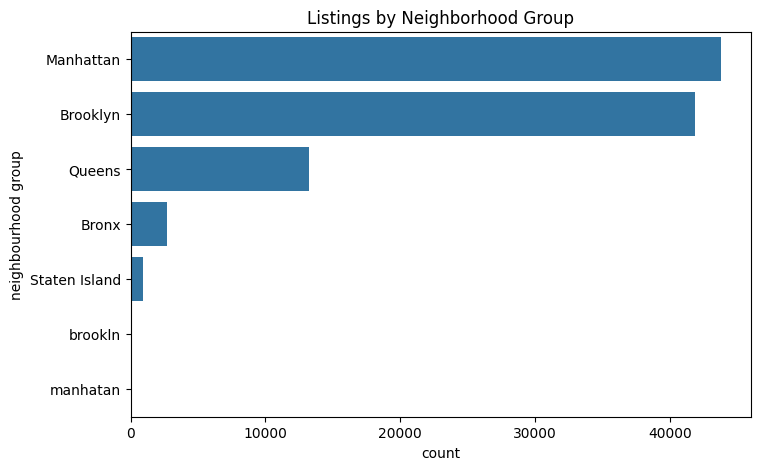

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(y='neighbourhood group', data=df, order=df['neighbourhood group'].value_counts().index)
plt.title("Listings by Neighborhood Group")
plt.show()

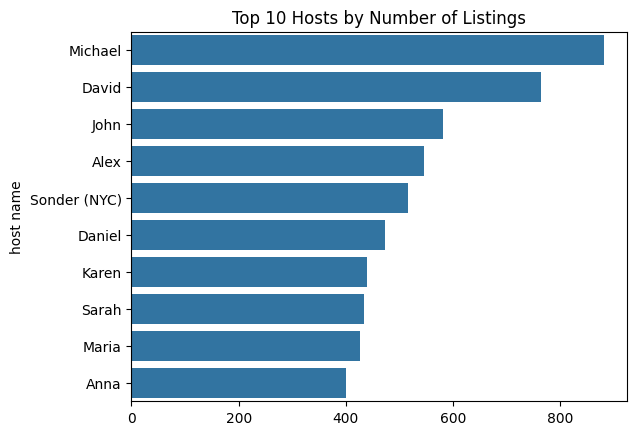

In [ ]:
top_hosts = df['host name'].value_counts().head(10)
sns.barplot(x=top_hosts.values, y=top_hosts.index)
plt.title("Top 10 Hosts by Number of Listings")
plt.show()

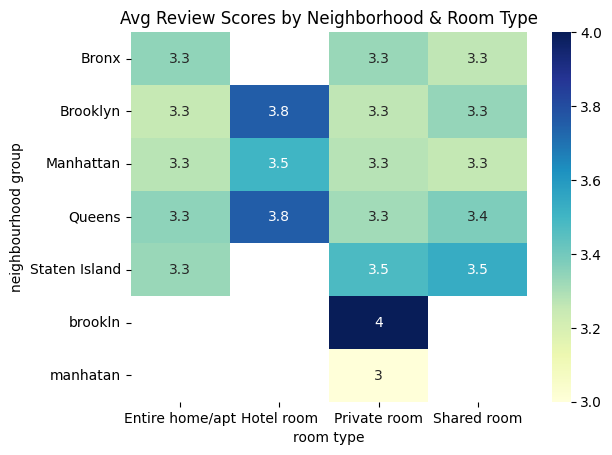

In [ ]:
pivot = df.pivot_table(index="neighbourhood group", columns="room type", values="review rate number", aggfunc="mean")
sns.heatmap(pivot, annot=True, cmap="YlGnBu")
plt.title("Avg Review Scores by Neighborhood & Room Type")
plt.show()

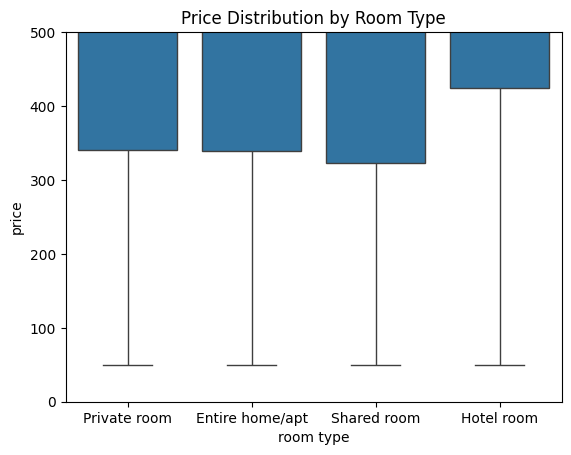

In [ ]:
sns.boxplot(x="room type", y="price", data=df)
plt.ylim(0, 500)
plt.title("Price Distribution by Room Type")
plt.show()

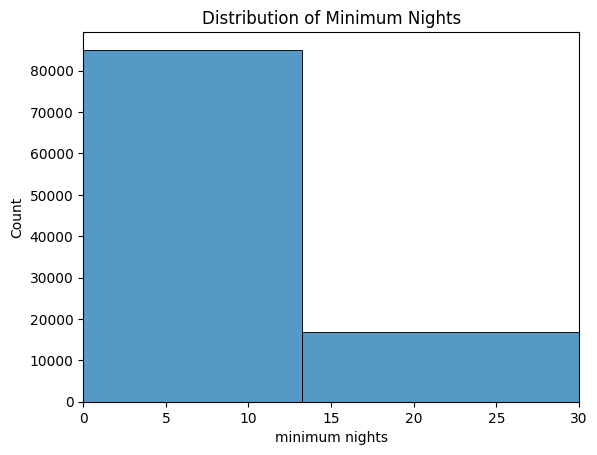

In [ ]:
sns.histplot(df['minimum nights'], bins=50, kde=False)
plt.xlim(0, 30)
plt.title("Distribution of Minimum Nights")
plt.show()

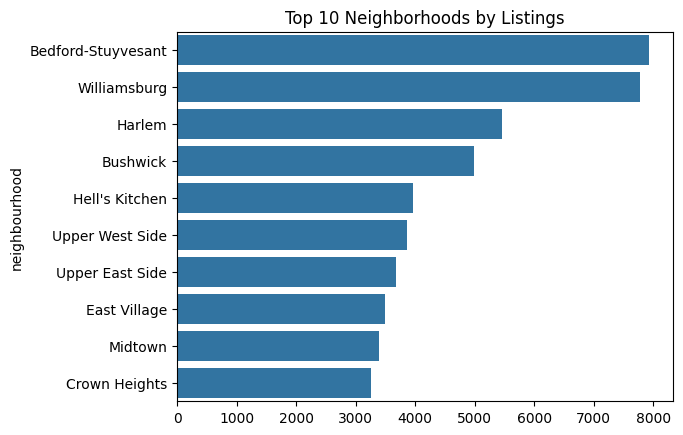

In [ ]:
top_neigh = df['neighbourhood'].value_counts().head(10)
sns.barplot(x=top_neigh.values, y=top_neigh.index)
plt.title("Top 10 Neighborhoods by Listings")
plt.show()


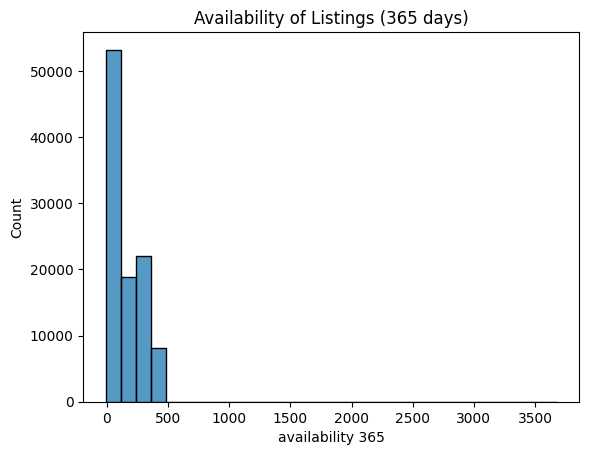

In [ ]:
sns.histplot(df['availability 365'], bins=30)
plt.title("Availability of Listings (365 days)")
plt.show()


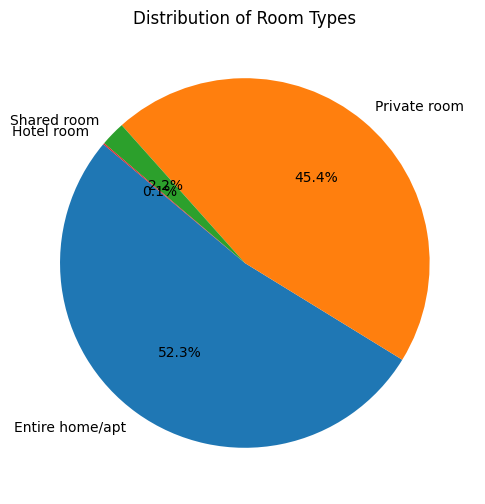

In [ ]:
df['room type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, figsize=(6,6))
plt.title("Distribution of Room Types")
plt.ylabel("")
plt.show()